In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
hit.head(8)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A


In [3]:
hit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [4]:
df = hit.copy()

In [5]:
df = df.dropna()

In [6]:
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

In [7]:
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype('float64')
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
x

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [8]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [9]:
x_train = pd.DataFrame(x_train["Hits"])
x_test = pd.DataFrame(x_test["Hits"])

In [10]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [11]:
cart_model.fit(x_train, y_train)

DecisionTreeRegressor()

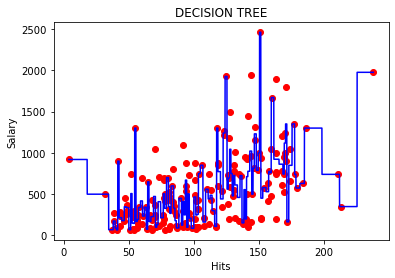

In [12]:
x_grid = np.arange(min(np.array(x_train)),max(np.array(x_train)), 0.01) 
x_grid = x_grid.reshape((len(x_grid), 1))  
plt.scatter(x_train, y_train, color = "red") 
plt.plot(x_grid, cart_model.predict(x_grid), color = "blue")  
plt.title("DECISION TREE")  
plt.xlabel("Hits") 
plt.ylabel("Salary") ;

In [13]:
!pip install SKompiler[full]

In [14]:
from skompiler import skompile

In [15]:
print(skompile(cart_model.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else 

In [16]:
x = [91]

In [17]:
((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else ((((328.88899999999995 if x[0] <= 79.0 else 700.0) if 
    x[0] <= 80.5 else 348.75 if x[0] <= 81.5 else 267.5) if x[0] <= 82.5 else
    600.0 if x[0] <= 83.5 else 600.0) if x[0] <= 84.5 else (331.25 if x[0] <=
    85.5 else (180.0 if x[0] <= 86.5 else 91.5) if x[0] <= 88.5 else 450.0 if
    x[0] <= 90.5 else 125.0) if x[0] <= 91.5 else 411.25 if x[0] <= 92.5 else
    250.0) if x[0] <= 93.5 else 670.0 if x[0] <= 94.5 else ((100.0 if x[0] <=
    95.5 else 504.1665) if x[0] <= 96.5 else 210.0 if x[0] <= 98.0 else 
    87.5) if x[0] <= 100.0 else 466.0) if x[0] <= 101.5 else 247.5 if x[0] <=
    102.5 else 257.3334) if x[0] <= 103.5 else (750.0 if x[0] <= 105.0 else
    850.0) if x[0] <= 107.0 else 162.5 if x[0] <= 109.0 else (560.0 if x[0] <=
    111.0 else 442.5 if x[0] <= 112.5 else 487.5) if x[0] <= 114.0 else 
    300.0) if x[0] <= 116.0 else 110.0) if x[0] <= 117.5 else ((((1300.0 if
    x[0] <= 118.5 else 773.3333333333334 if x[0] <= 120.5 else 442.5) if x[
    0] <= 122.5 else 1240.0 if x[0] <= 124.0 else 1925.571) if x[0] <= 
    125.5 else (561.25 if x[0] <= 126.5 else (695.2776666666667 if x[0] <= 
    127.5 else 1043.75) if x[0] <= 128.5 else (750.0 if x[0] <= 129.5 else 
    480.0) if x[0] <= 130.5 else 726.6666666666666) if x[0] <= 131.5 else (
    ((611.6665 if x[0] <= 133.5 else 461.0) if x[0] <= 135.5 else 725.0) if
    x[0] <= 137.0 else 152.5 if x[0] <= 138.5 else 555.0 if x[0] <= 139.5 else
    200.0) if x[0] <= 140.5 else 712.5 if x[0] <= 141.5 else 777.5) if x[0] <=
    143.0 else (((1021.6666666666666 if x[0] <= 144.5 else 500.0 if x[0] <=
    145.5 else 815.0) if x[0] <= 146.5 else 1230.0 if x[0] <= 148.0 else 
    787.5 if x[0] <= 149.5 else 1000.0) if x[0] <= 150.5 else 2460.0) if x[
    0] <= 151.5 else (451.6666666666667 if x[0] <= 153.0 else 580.0 if x[0] <=
    155.5 else 530.0) if x[0] <= 157.5 else (((((775.0 if x[0] <= 158.5 else
    759.1665) if x[0] <= 159.5 else 1670.0 if x[0] <= 161.5 else 923.0 if x
    [0] <= 165.5 else 863.0556666666666) if x[0] <= 168.5 else 
    743.3333333333334) if x[0] <= 169.5 else 1118.75 if x[0] <= 170.5 else 
    1350.0) if x[0] <= 171.5 else 165.0 if x[0] <= 173.0 else (849.3335 if 
    x[0] <= 175.5 else 1350.0) if x[0] <= 177.5 else (740.0 if x[0] <= 
    178.5 else 575.0 if x[0] <= 181.5 else 630.0) if x[0] <= 185.0 else 
    1300.0 if x[0] <= 198.5 else 740.0) if x[0] <= 212.0 else 350.0) if x[0
    ] <= 225.5 else 1975.0)

125.0

In [18]:
cart_model.predict(x_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [19]:
cart_model.predict([[91]])

array([125.])

In [20]:
y_pred =cart_model.predict(x_test)

In [21]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884